Importing the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
#Adjust the configuration of the plots we will create
%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8)  #Adjust the configuration of the plots we will create

In [3]:
#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

Data Collection and Processing

In [4]:
#Load the data from csv file to pandas dataframe
data = pd.read_csv("train.csv")
#Printing the first 5 rows of the dataframe
data.head()
#printing the number of rows and columns
data.shape

(891, 12)

In [5]:
#Getting info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Checking the number of missing values in each columns
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [7]:
# drop the cabin column from the data frame
data = data.drop(columns = 'Cabin' , axis = 1)

In [8]:
#Replacing the missing values in age column with mean value
data['Age'].fillna(data['Age'].mean() , inplace = True)

In [9]:
#finding the mode value of Embarked column
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [10]:
data['Embarked'].mode()[0]

'S'

In [11]:
# Replacing the missing values in the imbarked column with mode values
data['Embarked'].fillna(data['Embarked'].mode()[0] , inplace = True)

In [12]:
#Checking the number of missing values in each columns
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Data Analysis

In [13]:
# Getting some statistical measures about the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
#finding the number of people survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

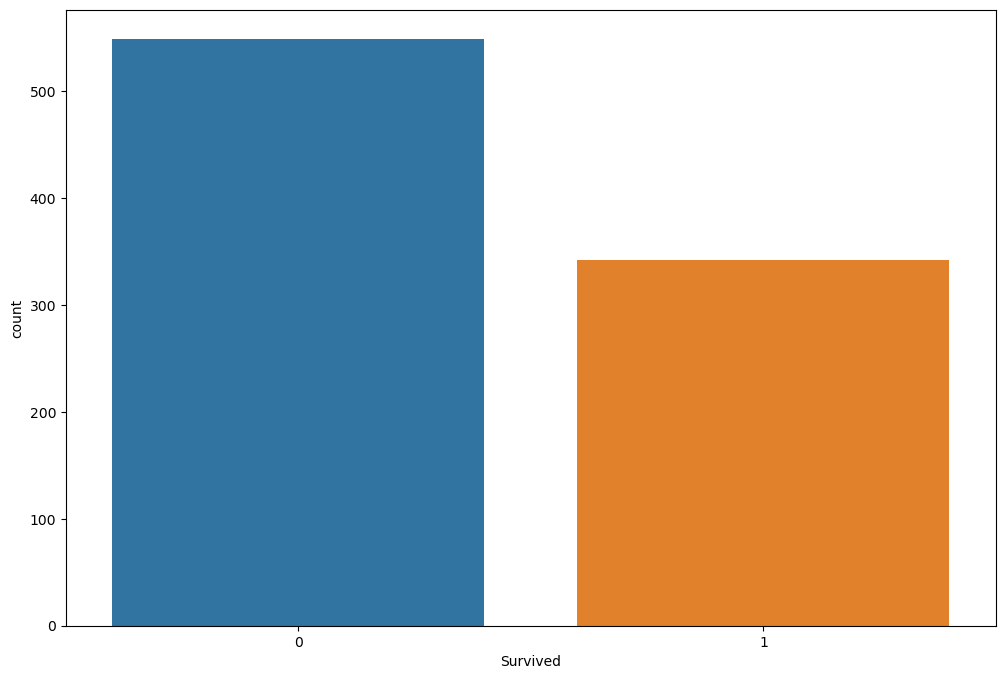

In [15]:
#making a  count plot for Survived column
sns.countplot('Survived' , data = data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

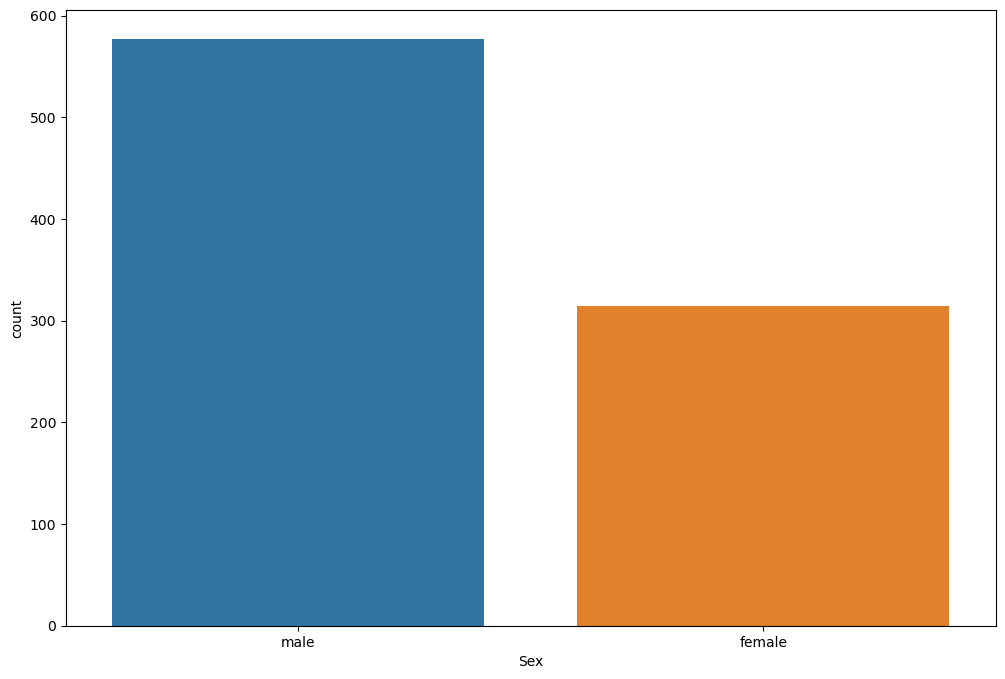

In [16]:
#making a  count plot for Sex column
sns.countplot('Sex' , data = data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

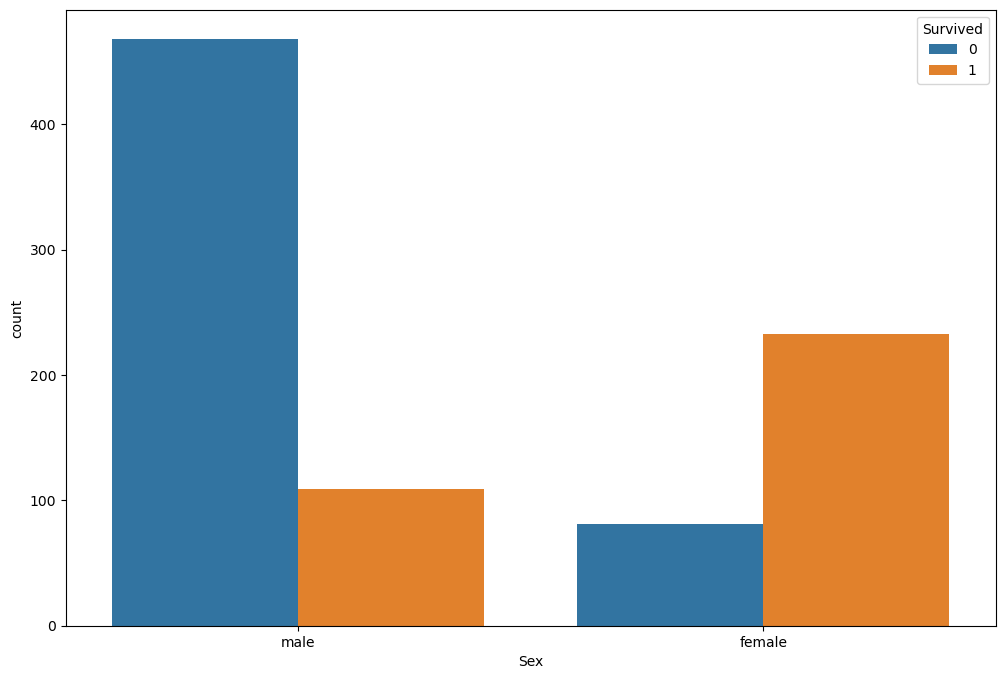

In [17]:
#Number of survivors Gender vise
sns.countplot('Sex' , data = data , hue = 'Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

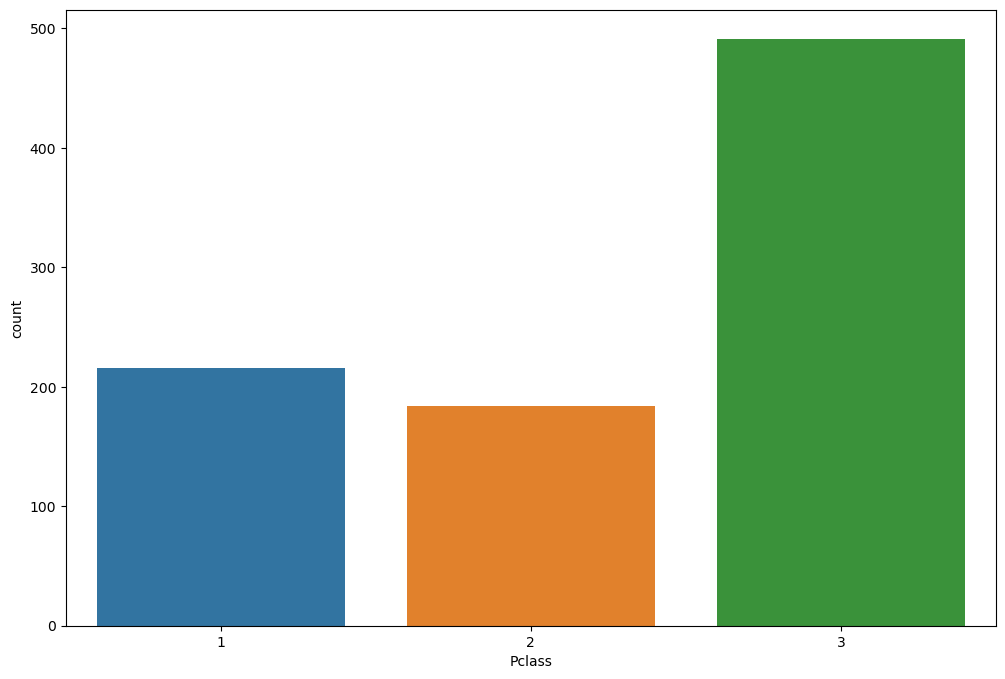

In [18]:
# Number of survivors Pclass vise
sns.countplot('Pclass' , data = data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

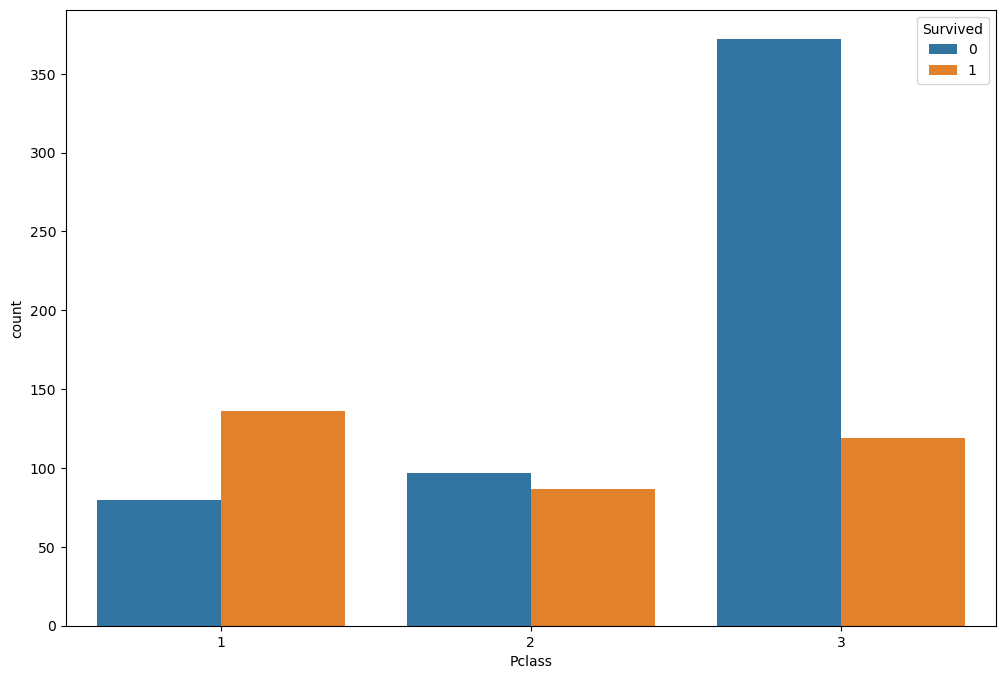

In [19]:
# Number of survivors Pclass vise
sns.countplot('Pclass' , data = data , hue='Survived')

Encoding the Catergorical Columns

In [20]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [21]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
# converting categorical columns

data.replace({'Sex':{'male':0 , 'female':1} , 'Embarked':{'S':0 , 'C':1 , 'Q':2}} , inplace = True)

In [23]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


Seperating features and Target

In [24]:
X = data.drop(columns = ['PassengerId' , 'Name' , 'Ticket' , 'Survived'] , axis = 1)

In [26]:
Y = data['Survived']

Splitting the data into training data and Test data

In [27]:
X_train, X_test , Y_train , Y_test = train_test_split(X_Check , Y , test_size = 0.2 , random_state = 2)

Logistic Regression

In [28]:
model = LogisticRegression()

In [29]:
# Training the Logisctic Regression Model with traning data
Logistic_model=model.fit(X_train , Y_train)

Model Evaluation

In [30]:
# Accuracy on training data
X_train_Prediction = model.predict(X_train)

In [31]:
training_data_accuracy = accuracy_score(Y_train , X_train_Prediction)

In [32]:
training_data_accuracy

0.8089887640449438

In [33]:
# Accuracy on test data
X_test_Prediction = model.predict(X_test)

In [34]:
testing_data_accuracy = accuracy_score(Y_test , X_test_Prediction)

In [36]:
testing_data_accuracy

0.7821229050279329

In [37]:
#Printing the cunfusion matrix
from sklearn.metrics import confusion_matrix

In [46]:
pd.DataFrame(confusion_matrix(Y_test , X_test_Prediction), columns = ['Predicted No' , 'Predicted Yes'] , index = ['Actual No' , 'Actual Yes']) 

,Predicted No,Predicted Yes
Actual No,91,9
Actual Yes,30,49


In [52]:
from sklearn.metrics import classification_report
print(classification_report(Y_test , X_test_Prediction))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82       100
           1       0.84      0.62      0.72        79

    accuracy                           0.78       179
   macro avg       0.80      0.77      0.77       179
weighted avg       0.79      0.78      0.78       179



Precision is fine considering Model Selected and Available Data. Accuracy can be increased by further using more features (which we dropped earlier) and/or by using other model

Note:
Precision : Precision is the ratio of correctly predicted positive observations to the total predicted positive observations
Recall : Recall is the ratio of correctly predicted positive observations to the all observations in actual class F1 score - F1 Score is the weighted average of Precision and Recall.